In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set(style ="whitegrid",context="notebook")
plt.rcParams['figure.figsize'] =(10,5)

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
#check % of missing data:
missing_df = df.isnull().sum().reset_index()
missing_df.columns =['Column','Missing_Values']
missing_df['Missing_Percent'] =(missing_df['Missing_Values'] / len(df))*100
missing_df.sort_values(by='Missing_Percent',ascending= False)

,Column,Missing_Values,Missing_Percent
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
3,Name,0,0.000000
2,Pclass,0,0.000000
1,Survived,0,0.000000
4,Sex,0,0.000000
7,Parch,0,0.000000
6,SibSp,0,0.000000


In [ ]:
print("Duplicated Row Count: ",df.duplicated().sum())

Duplicated Row Count:  0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [ ]:
df['Survived'].value_counts(normalize = True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


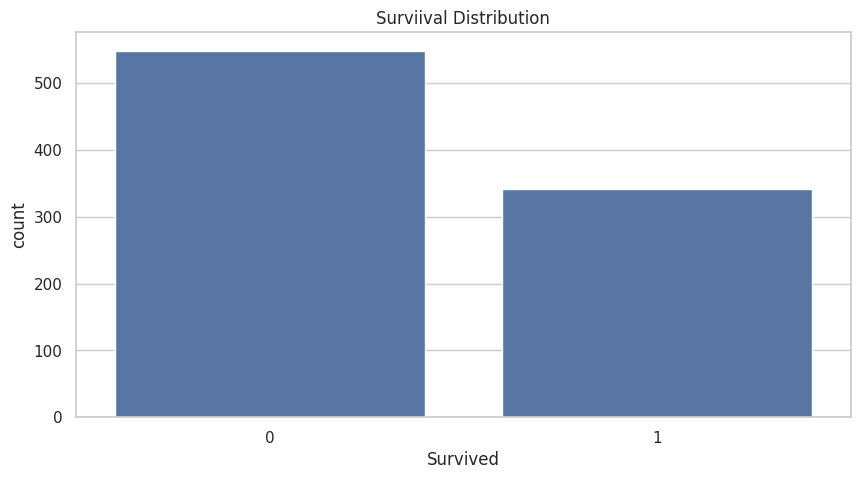

In [ ]:
sns.countplot(x ='Survived', data=df)
plt.title("Surviival Distribution")
plt.show()

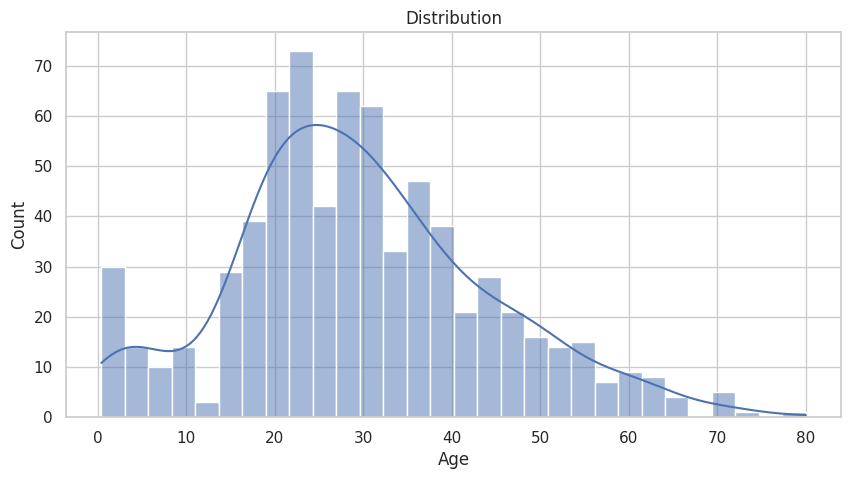

In [ ]:
sns.histplot(df['Age'], bins=30, kde = True)
plt.title("Distribution")
plt.show()

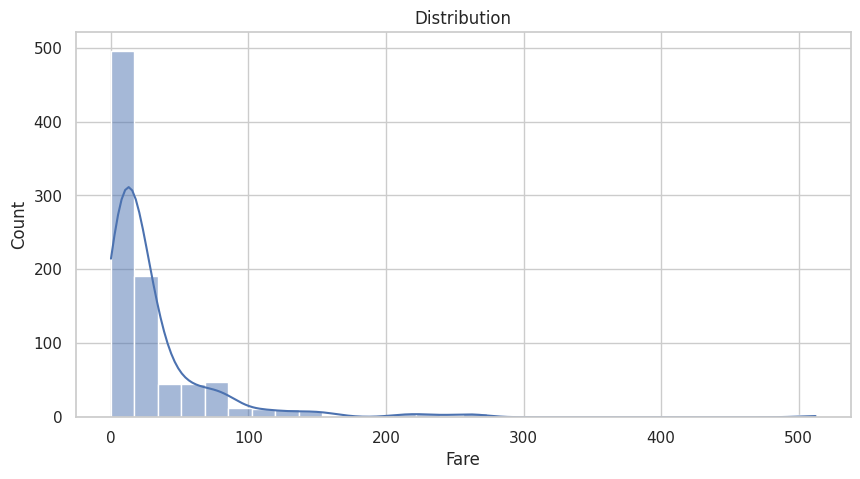

In [ ]:
#fare distribution
sns.histplot(df['Fare'], bins=30, kde = True)
plt.title("Distribution")
plt.show()

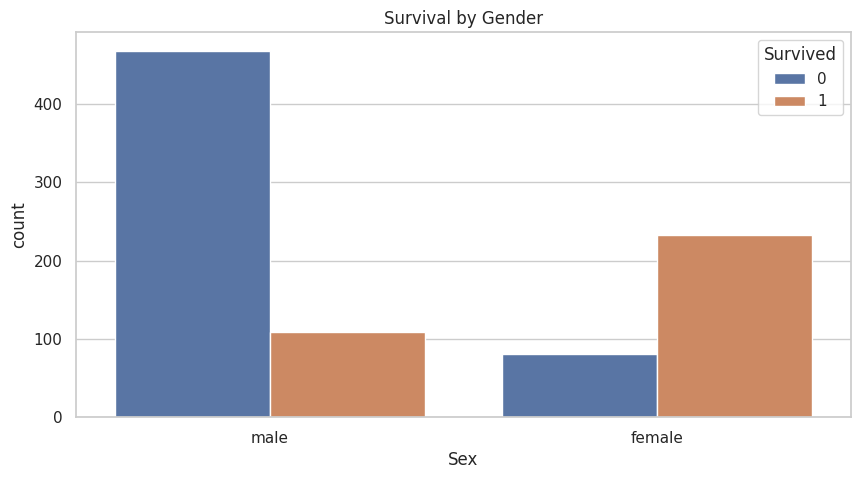

In [ ]:
#categorical Variable analysis
# gender vs survival

sns.countplot (x= 'Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

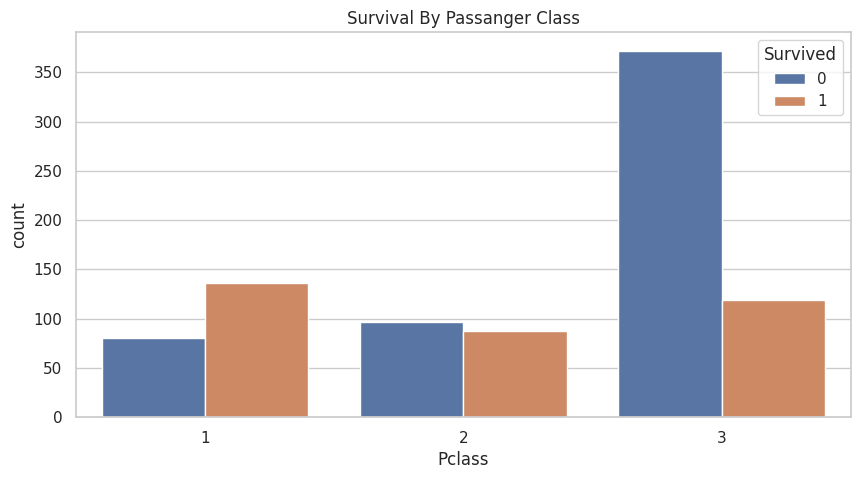

In [ ]:
sns.countplot(x ='Pclass', hue ='Survived', data= df)
plt.title("Survival By Passanger Class")
plt.show()

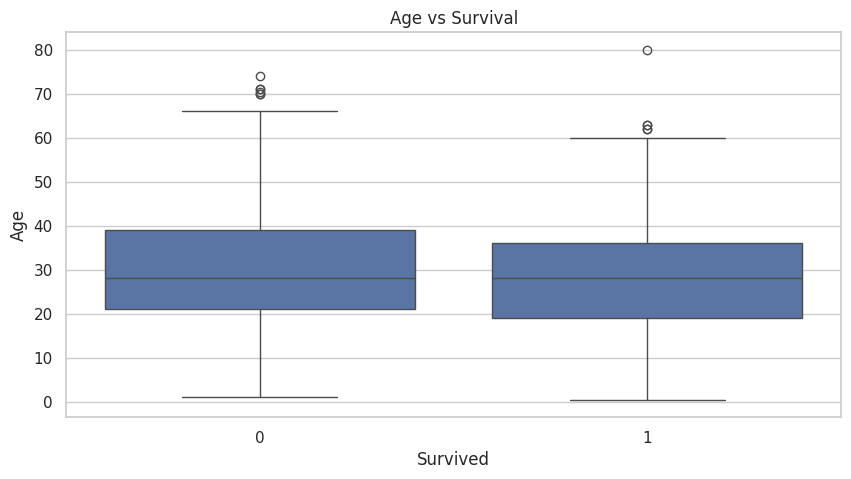

In [ ]:
#BIvarient
# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

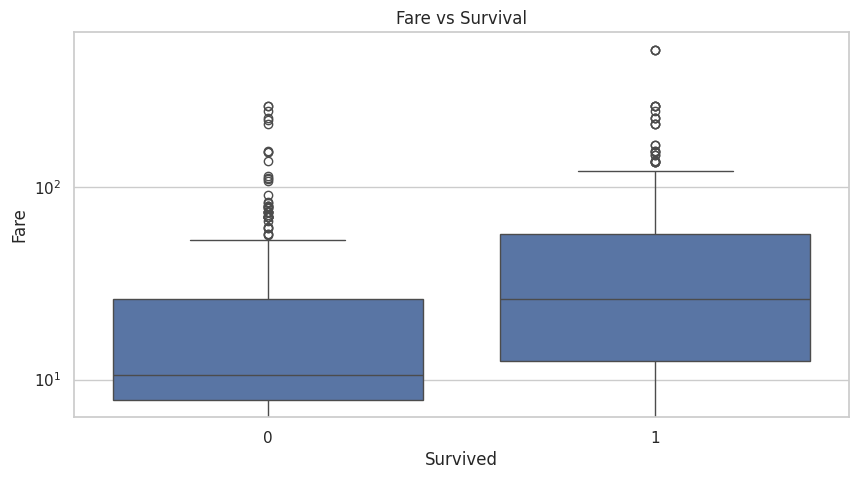

In [ ]:
#fare vs survival
sns.boxplot(x ='Survived', y='Fare', data=df)
plt.yscale('log')
plt.title("Fare vs Survival")
plt.show()

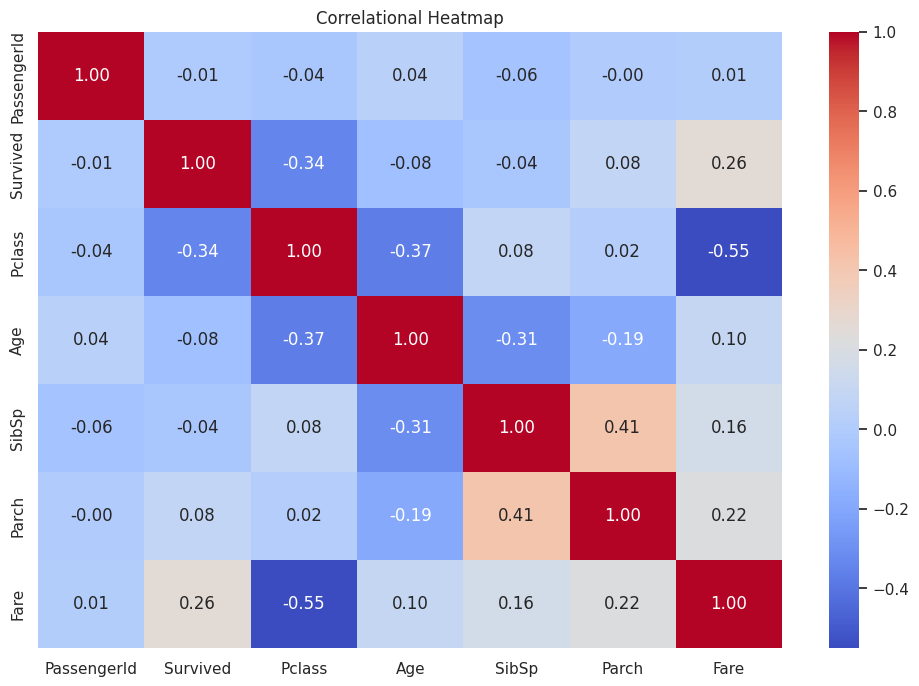

In [ ]:
#Corelation Analysis:
numeric_df = df.select_dtypes(include =['int64','float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True , cmap ='coolwarm', fmt =".2f")
plt.title("Correlational Heatmap")
plt.show()

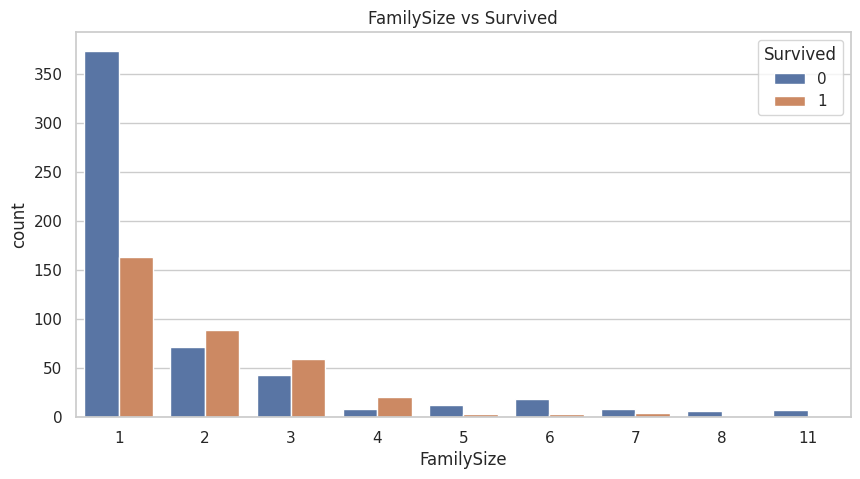

In [ ]:
#feature engineering
#familysize
df['FamilySize'] = df['SibSp'] +df['Parch']+1

sns.countplot( x='FamilySize', hue='Survived', data =df)
plt.title("FamilySize vs Survived")
plt.show()

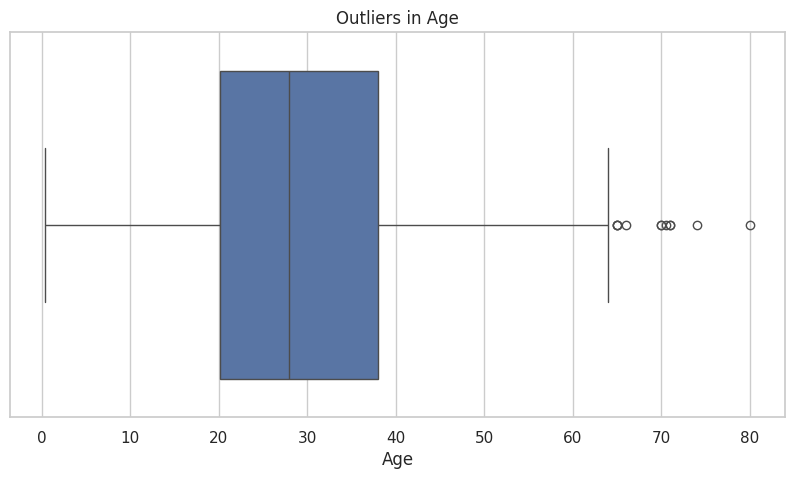

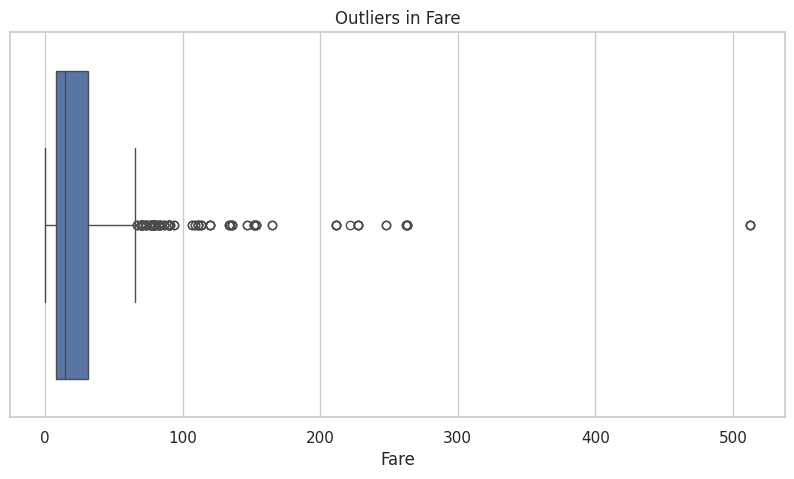

In [ ]:
#Outlier Detection
for col in ['Age','Fare']:
    sns.boxplot(x = df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [ ]:
#z-score
z_score = np.abs(stats.zscore(df[['Age','Fare']].dropna()))
outliers = (z_score > 3).sum(axis=0)
outliers

array([ 2, 18])

In [ ]:
0#EDA Summary:
eda_summary ={
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Missing Columns": missing_df[missing_df['Missing_Values']> 0]['Column'].tolist(),
    "Target Balance(%)": df['Survived'].value_counts(normalize=True).to_dict(),
    "Highly Co-Related Features": corr[corr>0.7].stack().index.tolist()
}
eda_summary

{'Total Rows': 891,
 'Total Columns': 13,
 'Missing Columns': ['Age', 'Cabin', 'Embarked'],
 'Target Balance(%)': {0: 0.6161616161616161, 1: 0.3838383838383838},
 'Highly Co-Related Features': [('PassengerId', 'PassengerId'),
  ('Survived', 'Survived'),
  ('Pclass', 'Pclass'),
  ('Age', 'Age'),
  ('SibSp', 'SibSp'),
  ('Parch', 'Parch'),
  ('Fare', 'Fare')]}